# Python Exercise 07

## Exercise 1
1. Go to this website: [https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop](https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop)
2. Use BeautifulSoup, to select the name and price for the laptops (hint: look for "product-list-container" to begin with).
3. Save the data, to be used for later.

## Exercise 2
1. Using Regular Expressions and the data from Exercise 1, find all laptops with the brand Asus.
2. Use Selenium to click on the most expensive Asus laptop, then find and print its graphics card, using BeautifulSoup.

## Exercise 3
1. Use the data from Exercise 2, to make a sorted bar chart of the laptops, where x-axis is names, and y-axis is price. 


In [2]:
##Imports
from time import sleep
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup as soup
import bs4
import requests
import re

In [62]:
##Exercise 1
##Use BeautifulSoup, to select the name and price for the laptops (hint: look for "product-list-container" to begin with).
r = requests.get('https://www.elgiganten.dk/catalog/gaming/dk-gaming-laptop/gaming-laptop')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

laptop_list = soup.findAll("a",{"class":"product-name"})
print("Laptops found: " + str(len(laptop_list)))

names = []
prices = []

price = soup.select('div[class=product-price]')
name = soup.select('span[class=table-cell]')

for idx, val in enumerate(name):
    names.append(name[idx].getText())
    prices.append(price[idx].getText())
    
res = dict(zip(names, prices))

Laptops found: 24


In [91]:
##Exercise 2 
##Using Regular Expressions and the data from Exercise 1, find all laptops with the brand Asus.
brand_asus = re.compile(r'(asus).([\w\-]+)')

all_asus = brand_asus.findall(str(laptop_list))
print('All matches: {}'.format(all_asus))

All matches: [('asus', 'tuf-gaming-a15-fx506-15-6-gaming-computer-sort'), ('asus', 'rog-strix-g153qr-15-6-barbar-gaming-computer-gra'), ('asus', 'tuf-gaming-a15-fx506-15-6-barbar-gaming-computer'), ('asus', 'tuf-gaming-a17-fa706qm-17-3-barbar-gaming-computer-gra'), ('asus', 'zenbook-pro-15-ux535-15-6-barbar-computer-i7165121650tifhd'), ('asus', 'tuf-gaming-a17-fx706ii-h7048t-17-3-barbar-gaming-computer-gra'), ('asus', 'tuf-gaming-a15-fa506-15-6-barbar-computer-r585121660t')]


In [23]:
##Exercise 2 
##Use Selenium to click on the most expensive Asus laptop, then find and print its graphics card, using BeautifulSoup.        
print("Starting up...")
profile = webdriver.FirefoxProfile()
profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
options = Options()
options.headless = True

browser = webdriver.Firefox(options=options)

browser.get("https://www.elgiganten.dk/")

print("Got Browser..")

browser.implicitly_wait(3)

#cookie_button = browser.find_element_by_css_selector('div.coi-banner__page-footer:nth-child(2) > button:nth-child(2)')
#cookie_button.click()

print("Cookie Button Clicked..")
sleep(3) 

search_field = browser.find_element_by_id('main-search')
search_field.send_keys("Asus TUF Gaming A17 FA706QM 17,3")
search_field.submit()
print("Search Entered..")
sleep(3)

print()

page_source = browser.page_source
page_soup = soup(page_source,'html.parser')
res = page_soup.select_one(".specs li").text
print("Grfikkort i den søgte computer:", res)
browser.quit()

Starting up...
Got Browser..
Cookie Button Clicked..
Search Entered..

Grfikkort i den søgte computer: Nvidia GeForce RTX 3060 grafik


<BarContainer object of 24 artists>

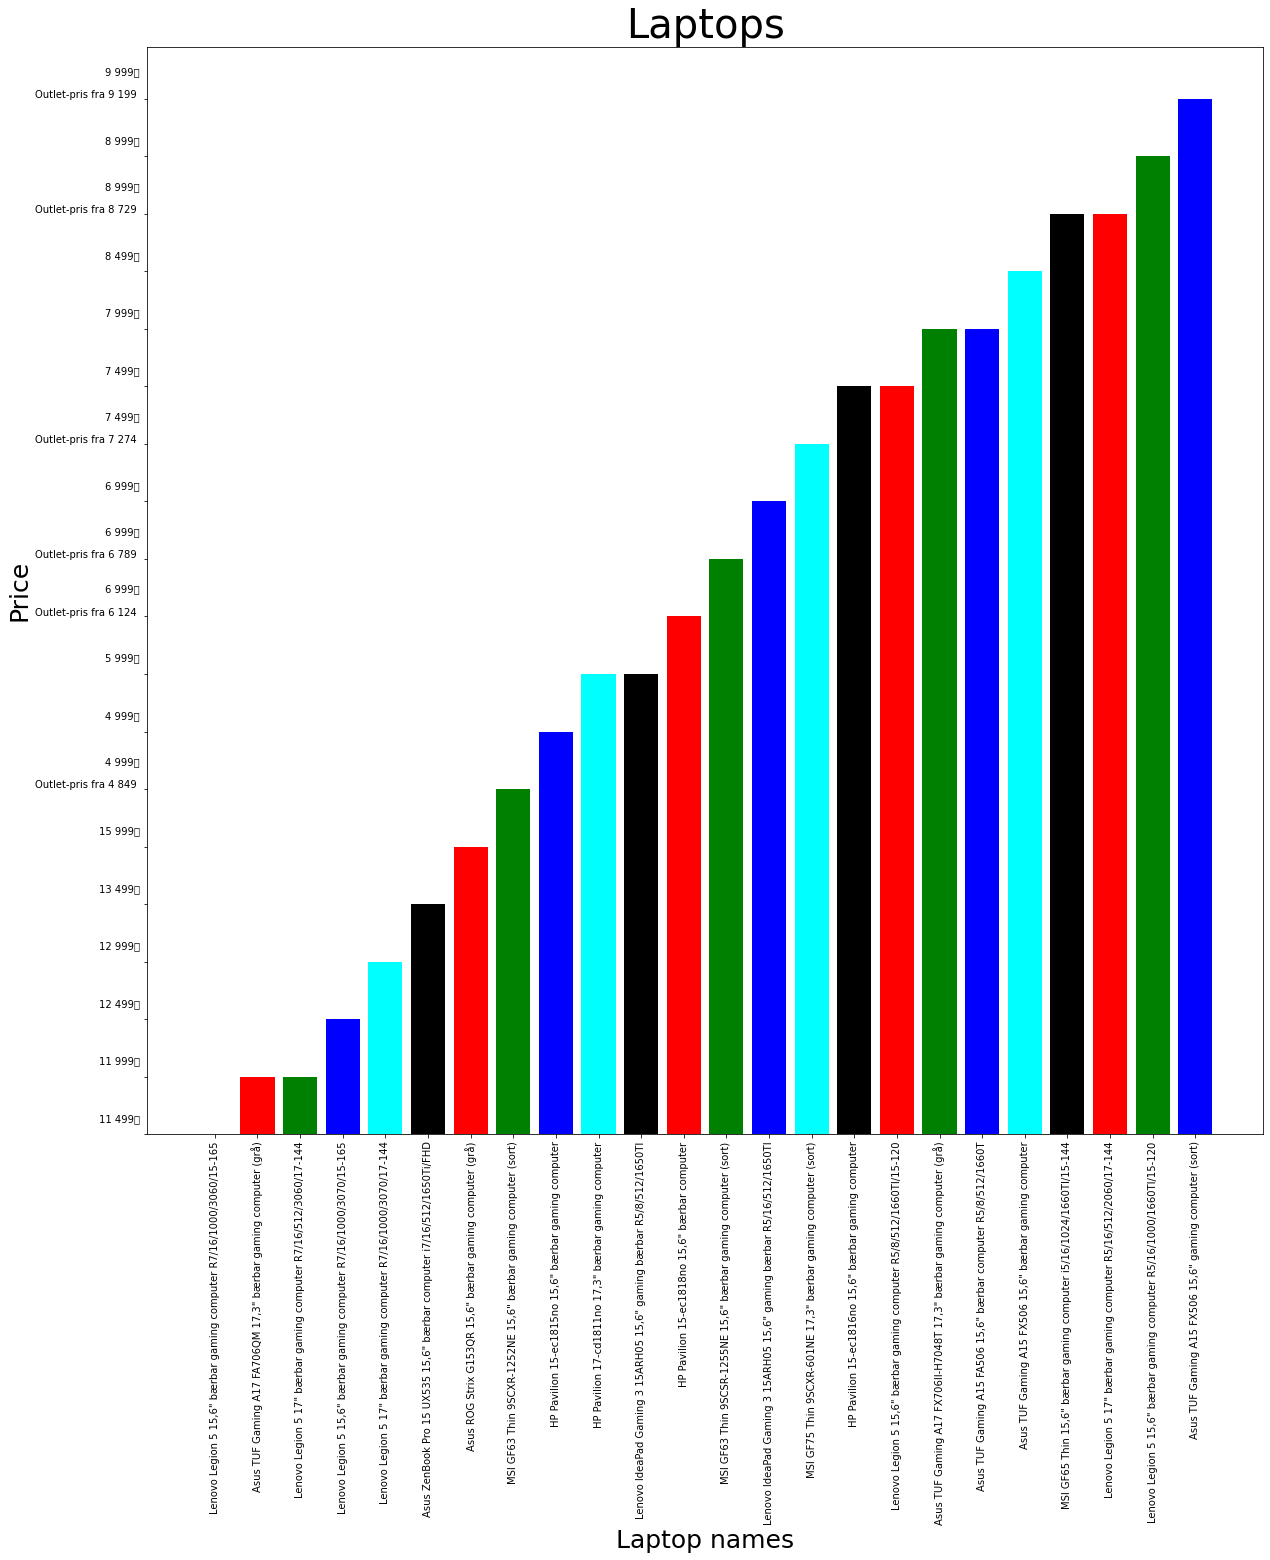

In [102]:
##Use the data from Exercise 1, to make a sorted bar chart of the laptops, where x-axis is names, and y-axis is price.
import matplotlib.pyplot as plt
%matplotlib inline

sorted_dict = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}

x = list(sorted_dict.keys())
y = list(sorted_dict.values())

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)

plt.title("Laptops", fontsize=40)
plt.xlabel("Laptop names", fontsize=25)
plt.ylabel("Price", fontsize=25)

plt.bar(x,y, color=['black', 'red', 'green', 'blue', 'cyan'])

